In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import pickle

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
# Training data
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.drop( ['SK_ID_CURR'], inplace=True, axis=1)

Training data shape:  (307511, 122)


In [3]:
#drop the columns which has more than 57% null values
#In EDA we saw that EXT_SOURCE1 has a high correlation and 56% missing values,
#so we decided to keep that and delete columns that have more than 57% missing value.
for col in app_train.columns:
    if sum(app_train[col].isnull())/float(len(app_train.index)) > 0.57:
        del app_train[col]

In [4]:
#drop the rows which has a null value
app_train = app_train.dropna()

Text(0.5, 0, 'Days Employed')

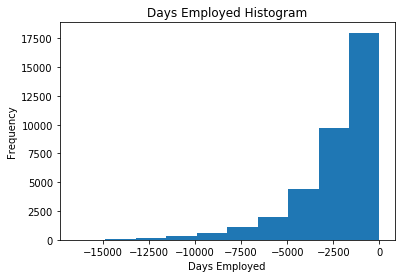

In [5]:
fig1 = app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employed Histogram');
plt.xlabel('Days Employed')


Text(0.5, 0, 'Days BIRTH')

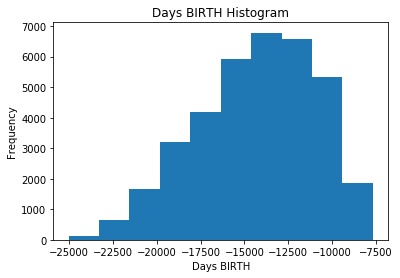

In [6]:
app_train['DAYS_BIRTH'].plot.hist(title = 'Days BIRTH Histogram');
plt.xlabel('Days BIRTH')

In [7]:
#Switched their values to their absolute values.
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])

In [8]:
#FLAG_MOBIL has 1 values in every row, FLAG_DOCUMENT_2 has 0 in every row. So we remove them.
app_train.drop( ["FLAG_MOBIL","FLAG_DOCUMENT_2"], inplace=True, axis=1)

<IPython.core.display.Javascript object>


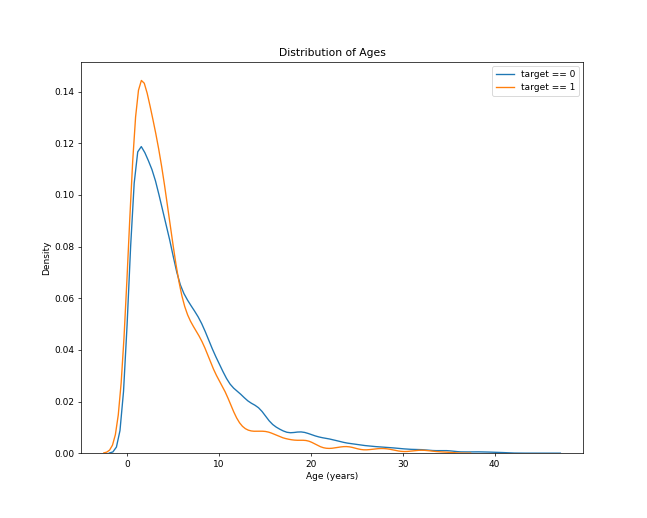

In [46]:
%matplotlib notebook
with open('kde1.pickle', 'rb') as pickle_file:
    pickle.load(pickle_file)

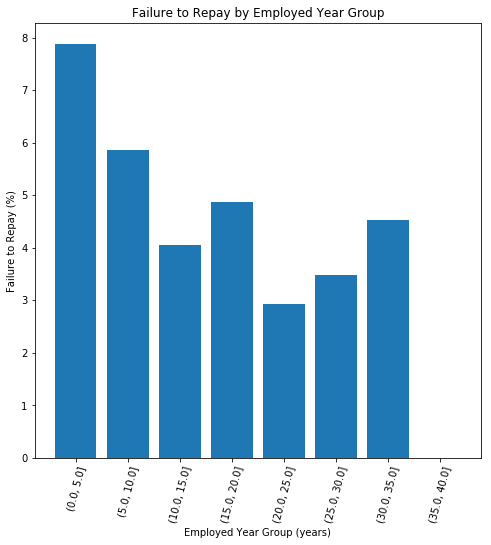

In [10]:
%matplotlib inline
# Employed year information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_EMPLOYED']]
age_data['DAYS_EMPLOYED'] = age_data['DAYS_EMPLOYED'] / 365

# Bin the employed year data
age_data['YEARS_BINNED'] = pd.cut(age_data['DAYS_EMPLOYED'], bins = np.linspace(0, 40, num = 9))
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
plt.figure(figsize = (8, 8))

# Graph the employed age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Employed Year Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Employed Year Group');

In [11]:
#creating new dataframe for correlation map(We picked the most correlated columns)
app_train1 = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','NAME_EDUCATION_TYPE',
                       'OCCUPATION_TYPE','CODE_GENDER','NAME_INCOME_TYPE','DAYS_BIRTH','DAYS_EMPLOYED',
                        'CNT_CHILDREN','AMT_INCOME_TOTAL']].copy()
app_train1.describe()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN,AMT_INCOME_TOTAL
count,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,36264.000000,3.626400e+04
mean,0.065685,0.506168,0.549828,0.494356,14299.107048,2368.465007,0.539902,1.936332e+05
std,0.247734,0.205886,0.174524,0.194336,3366.730682,2259.202504,0.755866,1.145574e+05
min,0.000000,0.014691,0.000010,0.000527,7680.000000,4.000000,0.000000,2.700000e+04
25%,0.000000,0.344601,0.458488,0.352340,11628.000000,780.000000,0.000000,1.260000e+05
50%,0.000000,0.510588,0.596036,0.513694,14004.000000,1669.000000,0.000000,1.710000e+05
75%,0.000000,0.672684,0.680748,0.651260,16627.000000,3189.000000,1.000000,2.250000e+05
max,1.000000,0.941986,0.855000,0.887664,25017.000000,16495.000000,19.000000,4.500000e+06


In [12]:
#encoded dataframes
with open('app_train1.pickle', 'rb') as pickle_file:
    app_train1 = pickle.load(pickle_file)
app_train1.head()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE_Academic degree,...,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working
0,1,0.083037,0.262949,0.139376,1,9461,637,0,202500.0,0,...,0,0,0,0,0,0,0,0,0,1
25,0,0.561948,0.651406,0.461482,0,19334,3494,0,90000.0,0,...,0,0,0,0,0,0,0,0,0,1
50,0,0.656225,0.450850,0.479449,0,12406,1176,0,54000.0,0,...,0,0,0,0,0,0,0,1,0,0
51,0,0.311510,0.713355,0.309275,1,18632,6977,1,540000.0,0,...,0,0,0,0,0,0,1,0,0,0
55,0,0.552772,0.616637,0.070109,0,12955,4106,0,180000.0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
with open('original_Xtrain.pickle', 'rb') as pickle_file:
    original_Xtrain = pickle.load(pickle_file)
with open('original_Xtest.pickle', 'rb') as pickle_file:
    original_Xtest = pickle.load(pickle_file)
with open('original_ytrain.pickle', 'rb') as pickle_file:
    original_ytrain = pickle.load(pickle_file)
with open('original_ytest.pickle', 'rb') as pickle_file:
    original_ytest = pickle.load(pickle_file)

In [14]:
with open('new_app_train.pickle', 'rb') as pickle_file:
    new_app_train = pickle.load(pickle_file)

with open('new_app_train1.pickle', 'rb') as pickle_file:
    new_app_train1 = pickle.load(pickle_file)

with open('new_app_train_poly.pickle', 'rb') as pickle_file:
    new_app_train_poly = pickle.load(pickle_file)

X = app_train.drop('TARGET', axis=1)
y = app_train['TARGET']

Distribution of the TARGET in the subsample dataset
1    0.5
0    0.5
Name: TARGET, dtype: float64


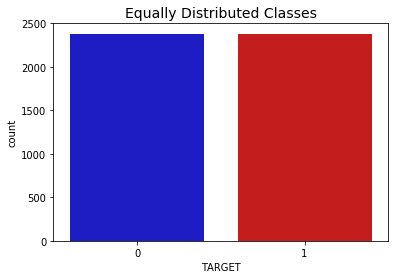

In [15]:
print('Distribution of the TARGET in the subsample dataset')
print(new_app_train1['TARGET'].value_counts()/len(new_app_train1))
colors = ["#0101DF", "#DF0101"]
sns.countplot('TARGET', data=new_app_train1, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Distribution of the TARGET in the Imbalanced dataset
0    0.934315
1    0.065685
Name: TARGET, dtype: float64


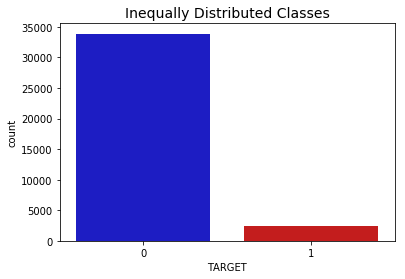

In [16]:
print('Distribution of the TARGET in the Imbalanced dataset')
print(app_train['TARGET'].value_counts()/len(app_train))
colors = ["#0101DF", "#DF0101"]
sns.countplot('TARGET', data=app_train, palette=colors)
plt.title('Inequally Distributed Classes', fontsize=14)
plt.show()

In [17]:
%matplotlib notebook
with open('heatmap.pickle', 'rb') as pickle_file:
    heatmap = pickle.load(pickle_file)

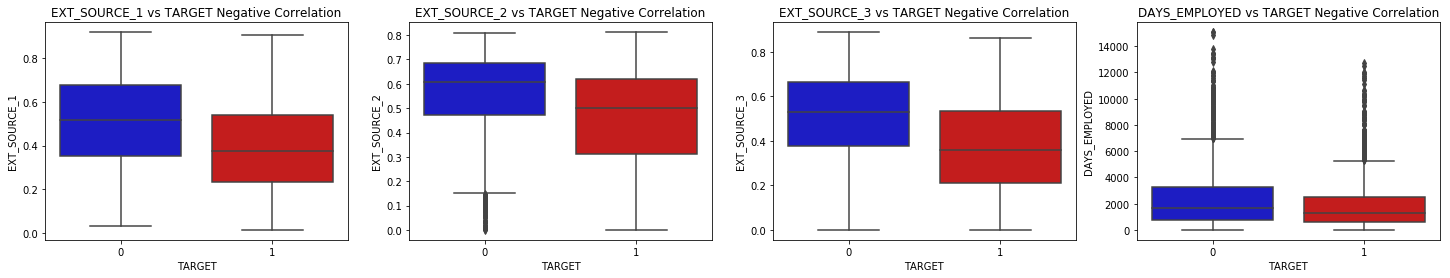

In [18]:
%matplotlib inline
###Drawing Box-Plots

f, axes = plt.subplots(ncols=4, figsize=(25,4))

# Negative Correlations with our Target
sns.boxplot(x="TARGET", y="EXT_SOURCE_1", data=new_app_train, palette=colors, ax=axes[0])
axes[0].set_title('EXT_SOURCE_1 vs TARGET Negative Correlation')

sns.boxplot(x="TARGET", y="EXT_SOURCE_2", data=new_app_train, palette=colors, ax=axes[1])
axes[1].set_title('EXT_SOURCE_2 vs TARGET Negative Correlation')


sns.boxplot(x="TARGET", y="EXT_SOURCE_3", data=new_app_train, palette=colors, ax=axes[2])
axes[2].set_title('EXT_SOURCE_3 vs TARGET Negative Correlation')


sns.boxplot(x="TARGET", y="DAYS_EMPLOYED", data=new_app_train1, palette=colors, ax=axes[3])
axes[3].set_title('DAYS_EMPLOYED vs TARGET Negative Correlation')

plt.show()

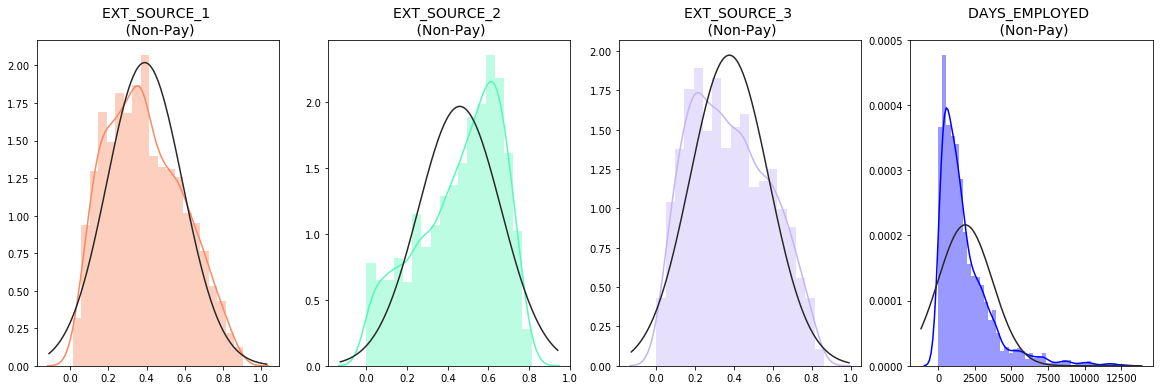

In [19]:

###Let's visualize the EXT_SOURCE distribution of non-payer people

from scipy.stats import norm

f, (ax1, ax2, ax3 , ax4) = plt.subplots(1,4, figsize=(20, 6))

ext_s1_nonpay = new_app_train['EXT_SOURCE_1'].loc[new_app_train['TARGET'] == 1].values
sns.distplot(ext_s1_nonpay,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('EXT_SOURCE_1 \n (Non-Pay)', fontsize=14)

ext_s2_nonpay = new_app_train['EXT_SOURCE_2'].loc[new_app_train['TARGET'] == 1].values
sns.distplot(ext_s2_nonpay,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('EXT_SOURCE_2 \n (Non-Pay)', fontsize=14)


ext_s2_nonpay = new_app_train['EXT_SOURCE_3'].loc[new_app_train['TARGET'] == 1].values
sns.distplot(ext_s2_nonpay,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('EXT_SOURCE_3 \n (Non-Pay)', fontsize=14)


days_emp_nonpay = new_app_train['DAYS_EMPLOYED'].loc[new_app_train['TARGET'] == 1].values
sns.distplot(days_emp_nonpay,ax=ax4, fit=norm, color='b')
ax4.set_title('DAYS_EMPLOYED \n (Non-Pay)', fontsize=14)

plt.show()

In [20]:
###Domain Knowledge Features
#We created new columns which might be important to analyze our model.

app_train_domain = new_app_train.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

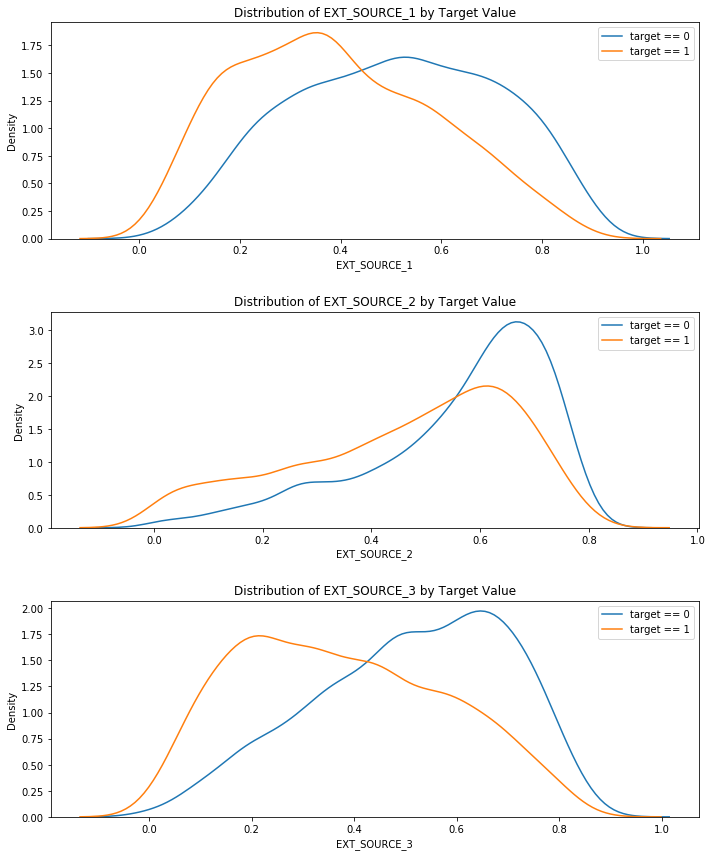

In [21]:

###we looked at the distribution of each of EXT_SOURCE features colored by the value of the target


plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(new_app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(new_app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

<IPython.core.display.Javascript object>


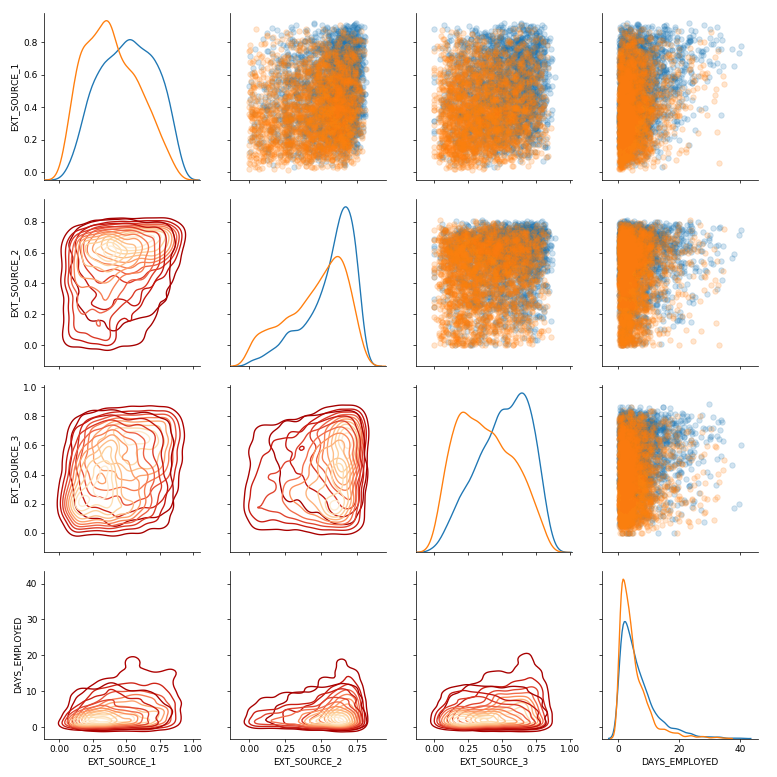

In [47]:
%matplotlib notebook

plot_data = new_app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].copy()


# Add in the age of the client in years
plot_data['DAYS_EMPLOYED'] = age_data['DAYS_EMPLOYED']

with open('pairplot.pickle', 'rb') as pickle_file:
    grid = pickle.load(pickle_file)

<IPython.core.display.Javascript object>


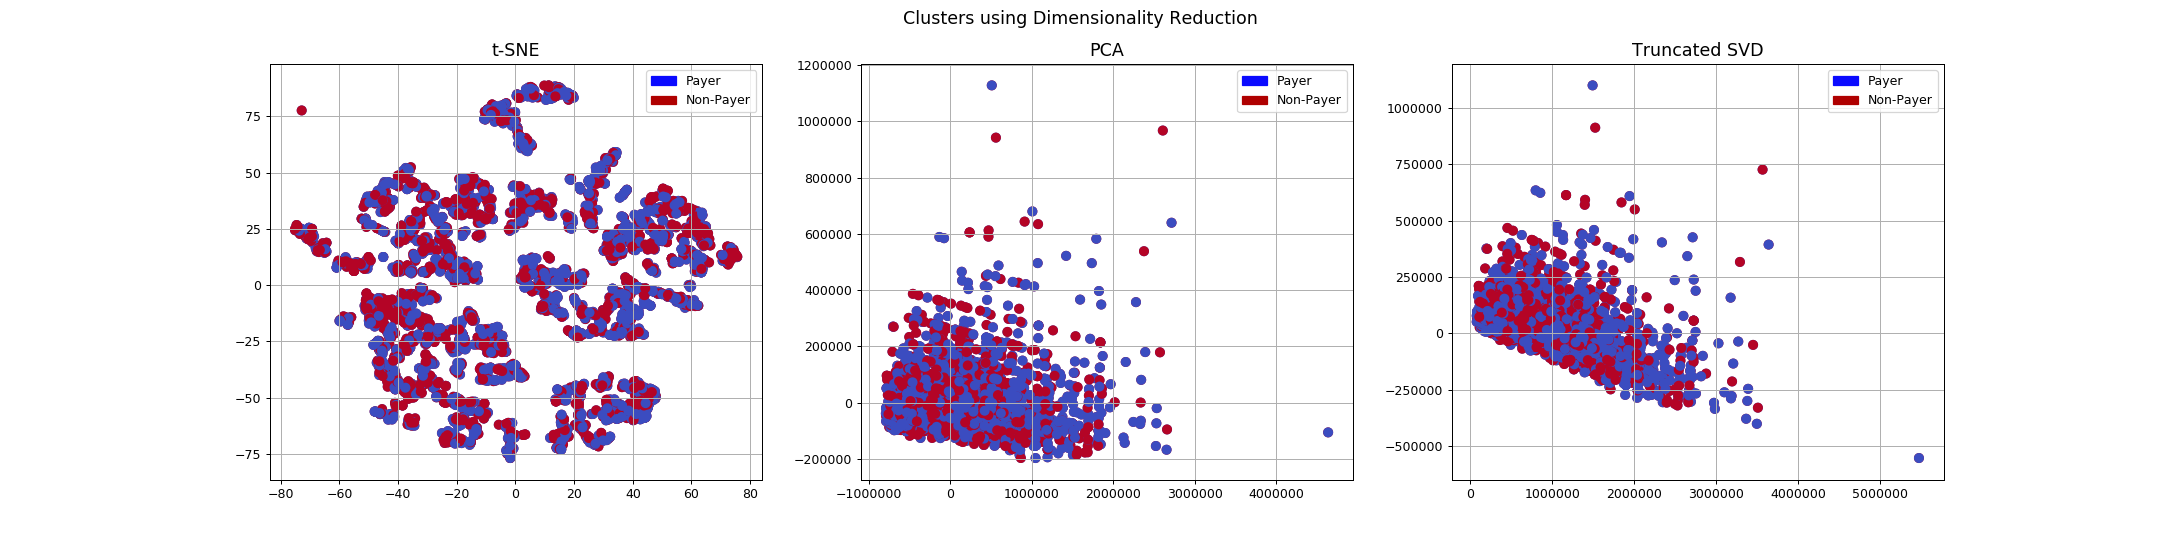

In [48]:

%matplotlib notebook

X = new_app_train.drop('TARGET', axis=1)
y = new_app_train['TARGET']

with open('X_reduced_tsne.pickle', 'rb') as pickle_file:
    X_reduced_tsne = pickle.load(pickle_file)

with open('X_reduced_pca.pickle', 'rb') as pickle_file:
    X_reduced_pca = pickle.load(pickle_file)

with open('X_reduced_svd.pickle', 'rb') as pickle_file:
    X_reduced_svd = pickle.load(pickle_file)
    
###Let's visualize it on a plot 


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['Payer', 'Nonpayer']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Payer')
red_patch = mpatches.Patch(color='#AF0000', label='Non-Payer')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Payer', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Non-Payer', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Payer', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Non-Payer', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Payer', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Non-Payer', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()


In [24]:
%matplotlib inline
# Undersampling before cross validating (prone to overfit)
X_poly = new_app_train_poly.drop('TARGET', axis=1)
y_poly = new_app_train_poly['TARGET']

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)


# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train_poly = X_train_poly.values
X_test_poly = X_test_poly.values
y_train_poly = y_train_poly.values
y_test_poly = y_test_poly.values

In [49]:
# Let's implement simple classifiers

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

# applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print( classifier.__class__.__name__, " Cross Validation Score:", round(training_score.mean(), 2) * 100, "% ")
    
RandomForestClassifier().fit(X_train_poly, y_train_poly)
training_score_poly = cross_val_score(RandomForestClassifier(), X_train_poly, y_train_poly, cv=5)
print( "RandomForestClassifier on Polynomial Feature", " Cross Validation Score:", round(training_score_poly.mean(), 2) * 100, "% ")

LogisticRegression  Cross Validation Score: 56.99999999999999 % 
KNeighborsClassifier  Cross Validation Score: 53.0 % 
RandomForestClassifier  Cross Validation Score: 62.0 % 
RandomForestClassifier on Polynomial Feature  Cross Validation Score: 64.0 % 


In [26]:
with open('grid_log_reg.pickle', 'rb') as pickle_file:
    grid_log_reg = pickle.load(pickle_file)

with open('log_reg.pickle', 'rb') as pickle_file:
    log_reg = pickle.load(pickle_file)
     
with open('knears_neighbors.pickle', 'rb') as pickle_file:
    knears_neighbors = pickle.load(pickle_file)    
    
with open('random_forest.pickle', 'rb') as pickle_file:
    random_forest = pickle.load(pickle_file)
    
with open('random_forest_poly.pickle', 'rb') as pickle_file:
    random_forest_poly = pickle.load(pickle_file)    
    


In [50]:
# Overfitting Case

with open('log_reg_score.pickle', 'rb') as pickle_file:
    log_reg_score = pickle.load(pickle_file)

with open('knears_score.pickle', 'rb') as pickle_file:
    knears_score = pickle.load(pickle_file)    
    
with open('random_forest_score.pickle', 'rb') as pickle_file:
    random_forest_score = pickle.load(pickle_file)
    
with open('random_forest_score_poly.pickle', 'rb') as pickle_file:
    random_forest_score_poly = pickle.load(pickle_file)  


print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

print('Random Forest Cross Validation Score:', round(random_forest_score.mean() * 100, 2).astype(str) + '%')

print('Random Forest Poly Cross Validation Score:', round(random_forest_score_poly.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  68.59%
Knears Neighbors Cross Validation Score 52.45%
Random Forest Cross Validation Score: 67.86%
Random Forest Poly Cross Validation Score: 67.1%


In [28]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

In [29]:
with open('undersample_accuracy.pickle', 'rb') as pickle_file:
    undersample_accuracy = pickle.load(pickle_file)

with open('undersample_precision.pickle', 'rb') as pickle_file:
    undersample_precision = pickle.load(pickle_file)    
    
with open('undersample_recall.pickle', 'rb') as pickle_file:
    undersample_recall = pickle.load(pickle_file)
    
with open('undersample_f1.pickle', 'rb') as pickle_file:
    undersample_f1 = pickle.load(pickle_file) 

with open('undersample_auc.pickle', 'rb') as pickle_file:
    undersample_auc = pickle.load(pickle_file) 


<IPython.core.display.Javascript object>


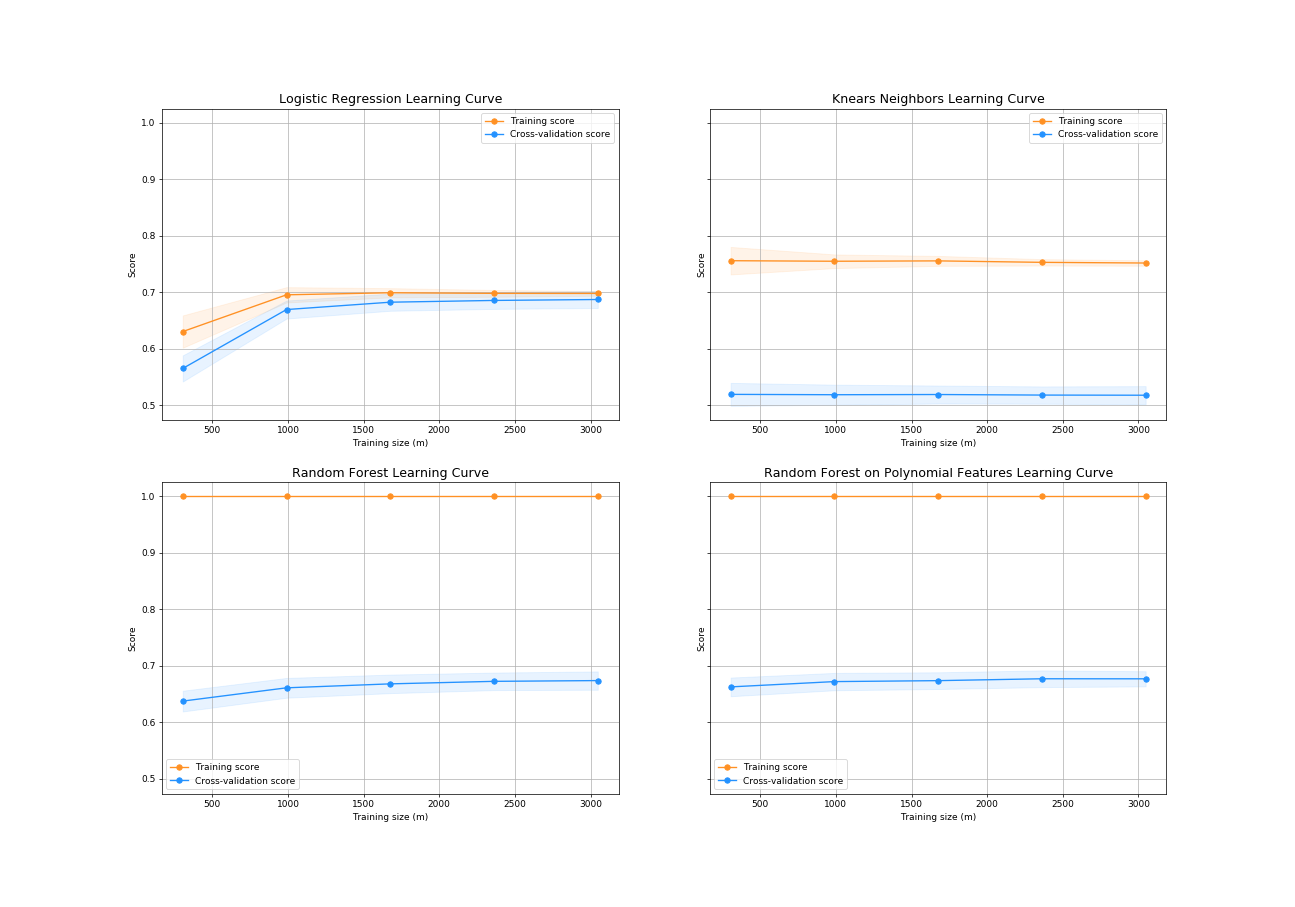

In [51]:
%matplotlib notebook
with open('learning_curve.pickle', 'rb') as pickle_file:
    learning_curve = pickle.load(pickle_file)

In [31]:
%matplotlib inline
with open('log_reg_pred.pickle', 'rb') as pickle_file:
    log_reg_pred = pickle.load(pickle_file)
    
with open('knears_pred.pickle', 'rb') as pickle_file:
    knears_pred = pickle.load(pickle_file)

with open('random_forest_pred.pickle', 'rb') as pickle_file:
    random_forest_pred = pickle.load(pickle_file)

with open('random_forest_pred_poly.pickle', 'rb') as pickle_file:
    random_forest_pred_poly = pickle.load(pickle_file)

In [32]:
print('Logistic Regression AUC: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors AUC: ', roc_auc_score(y_train, knears_pred))
print('Random Forest AUC: ', roc_auc_score(y_train, random_forest_pred))
print('Random Forest Poly AUC: ', roc_auc_score(y_train_poly, random_forest_pred_poly))

Logistic Regression AUC:  0.7511436501733171
KNears Neighbors AUC:  0.5245596292728175
Random Forest AUC:  0.6764439461315293
Random Forest Poly AUC:  0.6678633337354356


<IPython.core.display.Javascript object>


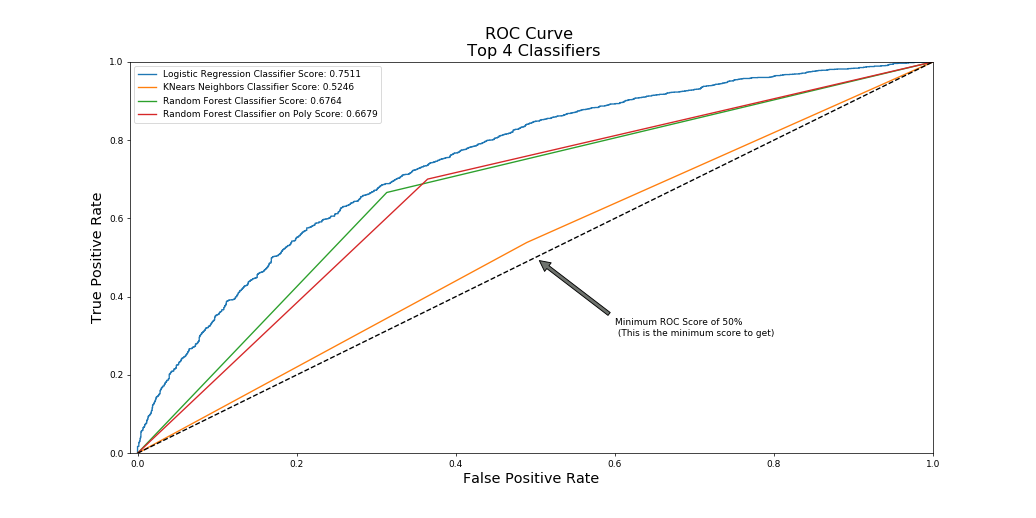

In [52]:
%matplotlib notebook
with open('roc_curve.pickle', 'rb') as pickle_file:
    roc_curve = pickle.load(pickle_file) 


In [34]:
%matplotlib inline
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


y_pred = log_reg.predict(X_train)

# Overfitting Case

print('Overfitting: \n')
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))

print('---' * 35)

# How it should look like
print('---' * 35)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 35)

Overfitting: 

Accuracy Score: 0.70
Recall Score: 0.69
Precision Score: 0.70
F1 Score: 0.70
---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.69
Recall Score: 0.53
Precision Score: 0.07
F1 Score: 0.13
---------------------------------------------------------------------------------------------------------


In [35]:
with open('undersample_average_precision.pickle', 'rb') as pickle_file:
    undersample_average_precision = pickle.load(pickle_file) 
print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.19


<IPython.core.display.Javascript object>


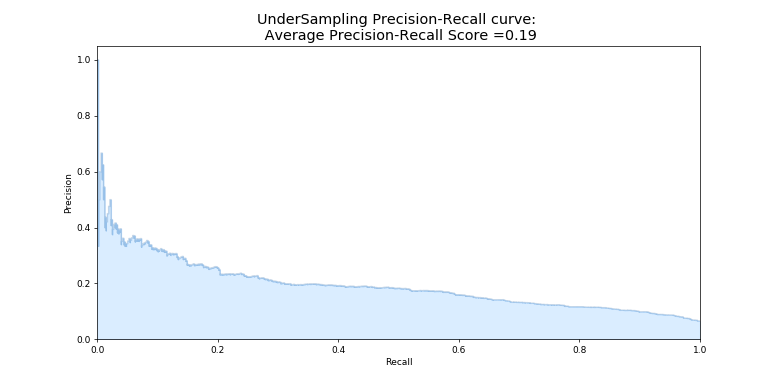

In [53]:
%matplotlib notebook
with open('undersample_average_precision_recall_curve.pickle', 'rb') as pickle_file:
    undersample_average_precision_recall_curve = pickle.load(pickle_file)

In [37]:
%matplotlib inline
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

with open('accuracy_lst.pickle', 'rb') as pickle_file:
    accuracy_lst = pickle.load(pickle_file)

with open('precision_lst.pickle', 'rb') as pickle_file:
    precision_lst = pickle.load(pickle_file)

with open('recall_lst.pickle', 'rb') as pickle_file:
    recall_lst = pickle.load(pickle_file)
    
with open('f1_lst.pickle', 'rb') as pickle_file:
    f1_lst = pickle.load(pickle_file)

print('---' * 35)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 35)

Length of X (train): 29012 | Length of y (train): 29012
Length of X (test): 7252 | Length of y (test): 7252
---------------------------------------------------------------------------------------------------------

accuracy: 0.7038112644918421
precision: 0.13641507697279107
recall: 0.6579351664811532
f1: 0.2259435774545012
---------------------------------------------------------------------------------------------------------


In [54]:
with open('best_class_report.pickle', 'rb') as pickle_file:
    best_class_report = pickle.load(pickle_file)
print(best_class_report)

              precision    recall  f1-score   support

         Pay       0.97      0.72      0.82      6776
     Non-Pay       0.14      0.68      0.24       476

    accuracy                           0.71      7252
   macro avg       0.56      0.70      0.53      7252
weighted avg       0.91      0.71      0.78      7252



In [39]:
with open('average_precision.pickle', 'rb') as pickle_file:
    average_precision = pickle.load(pickle_file)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.19


<IPython.core.display.Javascript object>


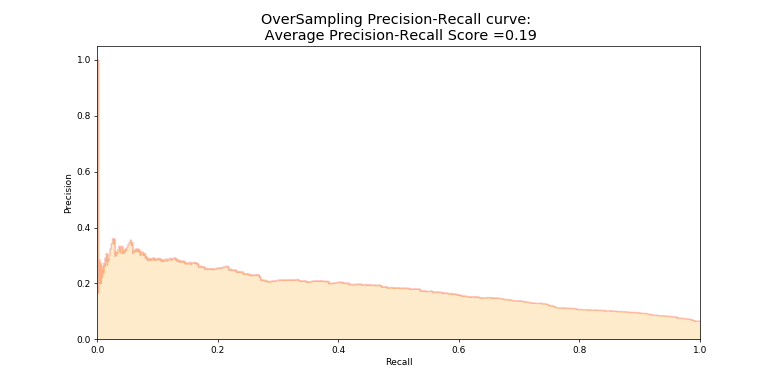

In [55]:
%matplotlib notebook
with open('oversample_average_precision_recall_curve.pickle', 'rb') as pickle_file:
    oversample_average_precision_recall_curve = pickle.load(pickle_file)

In [58]:
%matplotlib inline

with open('class_rep_log.pickle', 'rb') as pickle_file:
    class_rep_log = pickle.load(pickle_file)
with open('class_rep_knear.pickle', 'rb') as pickle_file:
    class_rep_knear = pickle.load(pickle_file)
with open('class_rep_rf.pickle', 'rb') as pickle_file:
    class_rep_rf = pickle.load(pickle_file)
with open('class_rep_rfp.pickle', 'rb') as pickle_file:
    class_rep_rfp = pickle.load(pickle_file)

print('Logistic Regression:')
print(class_rep_log)

print('KNears Neighbors:')
print(class_rep_knear)

print('Random Forest Neighbors:')
print(class_rep_rf)


print('Random Forest Poly Neighbors:')
print(class_rep_rfp)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       473
           1       0.73      0.73      0.73       480

    accuracy                           0.73       953
   macro avg       0.73      0.73      0.73       953
weighted avg       0.73      0.73      0.73       953

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.53      0.52      0.53       473
           1       0.53      0.54      0.54       480

    accuracy                           0.53       953
   macro avg       0.53      0.53      0.53       953
weighted avg       0.53      0.53      0.53       953

Random Forest Neighbors:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       473
           1       0.71      0.72      0.71       480

    accuracy                           0.71       953
   macro avg       0.71      0.71      0.71       953
weighted a

<IPython.core.display.Javascript object>


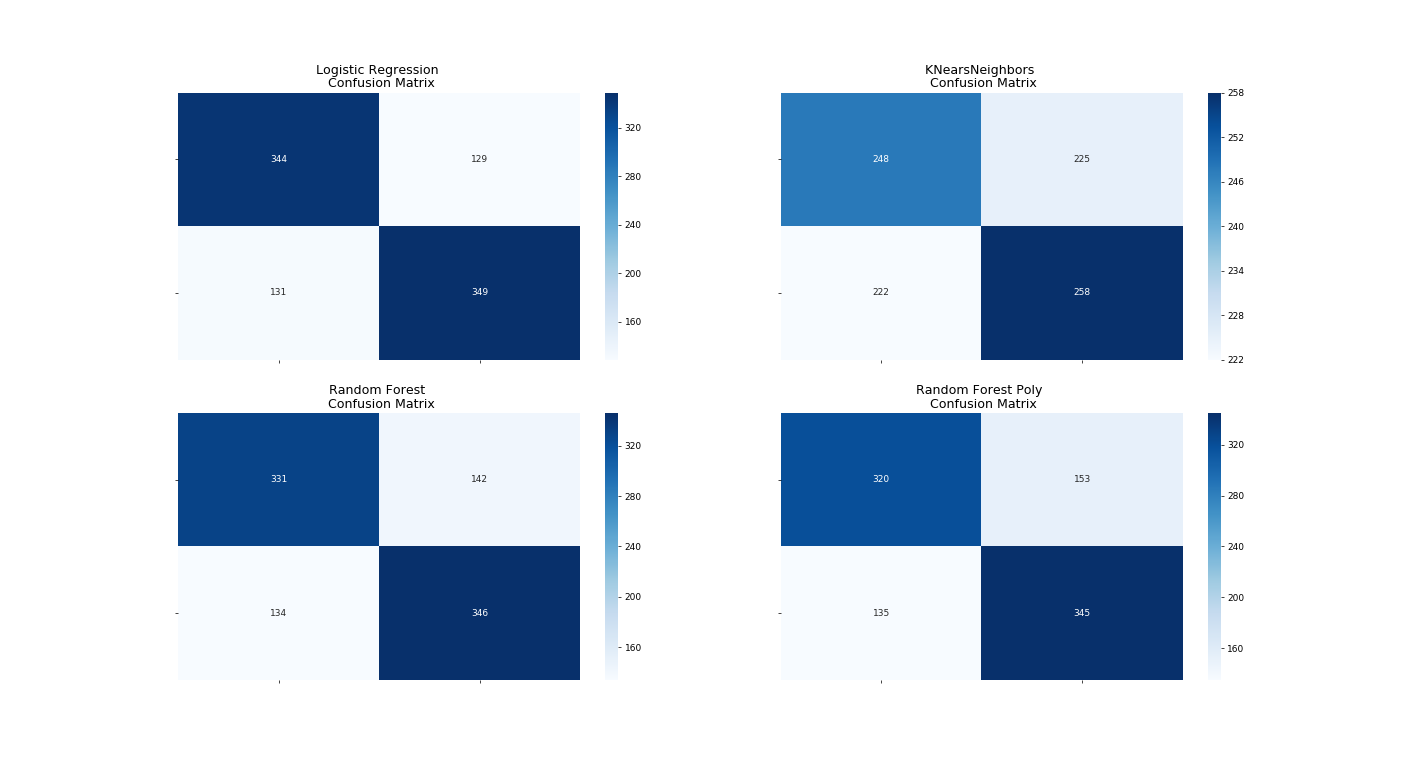

In [57]:
%matplotlib notebook
with open('confusion_matrices.pickle', 'rb') as pickle_file:
    confusion_matrices = pickle.load(pickle_file)

In [59]:
%matplotlib inline
with open('final_df.pickle', 'rb') as pickle_file:
    final_df = pickle.load(pickle_file)
    
final_df

,Technique,Score
0,Random UnderSampling,0.727177
1,Oversampling (SMOTE),0.712493


<IPython.core.display.Javascript object>


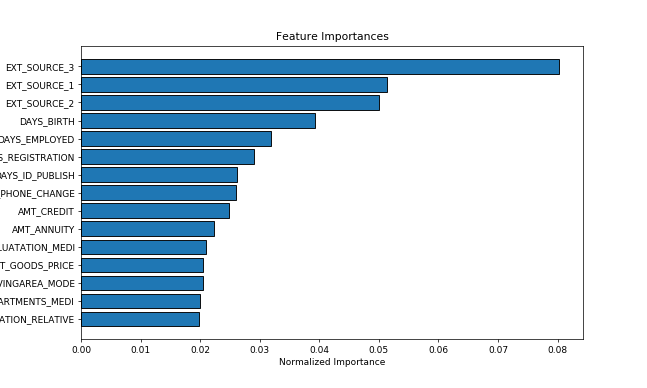

In [61]:
%matplotlib notebook
with open('feature_importances_sorted.pickle', 'rb') as pickle_file:
    feature_importances_sorted = pickle.load(pickle_file)

<IPython.core.display.Javascript object>


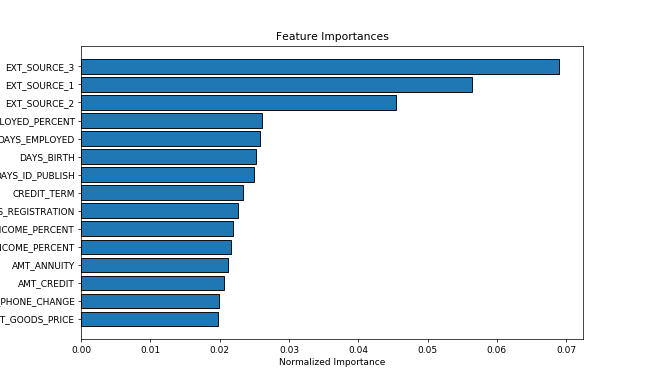

In [45]:
%matplotlib notebook
with open('feature_importances_domain_sorted.pickle', 'rb') as pickle_file:
    feature_importances_domain_sorted = pickle.load(pickle_file)
